In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo  
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-ycxplffb

  Cloning https://github.com/PyTorchLightning/pytorch-lightning to /tmp/pip-req-build-v30ixrip
  Running command git clone -q https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-req-build-v30ixrip
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 596 kB 6.0 MB/s 
     |████████████████████████████████| 332 kB 43.6 MB/s 
     |████████████████████████████████| 829 kB 28.4 MB/s 
     |████████████████████████████████| 132 kB 50.5 MB/s 
     |████████████████████████████████| 1.1 MB 33.3 MB/s 
     |████████████████████████████████| 192 kB 56.2 MB/s 
     |████████████████████████████████| 160 kB 56.6 MB/s 
     |████████████████████████████████| 271 kB 50.3 MB/s 
  Created wheel for pytorch-lightning: file

In [3]:
%cd /content/drive/MyDrive/20211/prj3/final-code-neo

/content/drive/MyDrive/20211/prj3/final-code-neo


In [4]:
from glob import glob

def get_all_image_name():
    path_images = glob('/content/drive/MyDrive/20211/prj3/data/train/train/*.jpeg')
    images_name_list = [i.split('/')[-1].split('.')[0] for i in path_images]
    return images_name_list 
images_name_list = get_all_image_name() 

path_img = '/content/drive/MyDrive/20211/prj3/data/train/train'
path_gt = '/content/drive/MyDrive/20211/prj3/data/train_gt/train_gt'
from data_loader import PolypDataset
import matplotlib.pyplot as plt

pl_dataset = PolypDataset(images_name_list, path_img, path_gt)

# show image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


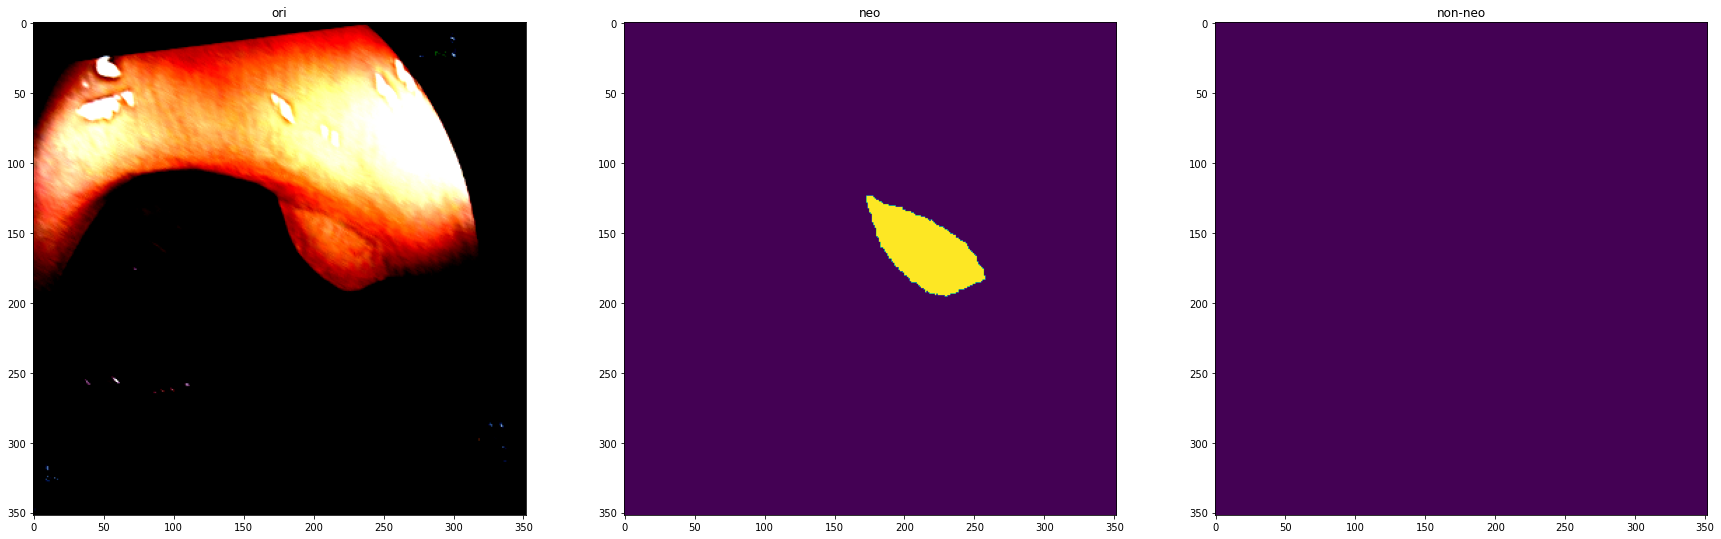

In [ ]:
from data_loader import PolypDataset
import matplotlib.pyplot as plt

r = pl_dataset.__getitem__(0)
image = r['image'].permute(1, 2, 0).numpy()  # (3, 352, 352) => (352, 352, 3)
gt = r['gt'].permute(1, 2, 0).numpy()
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 30))
ax[0].set_title('ori')
ax[1].set_title('neo')
ax[2].set_title('non-neo')
ax[0].imshow(image)
ax[1].imshow(gt[:,:,0])
ax[2].imshow(gt[:,:,1])

# train

In [5]:
import train
train.train_loop(pl_dataset)

Downloading: "https://github.com/PingoLH/Pytorch-HarDNet/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://ping-chao.com/hardnet/hardnet68-5d684880.pth" to /root/.cache/torch/hub/checkpoints/hardnet68-5d684880.pth


ImageNet pretrained weights for HarDNet68 is loaded
68 LOADED READY
Epoch 001/004


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.

Epoch 001 | Step 0000/0063 | Train loss: 3.0111 | Learning_rate: 0.0010000
Epoch 001 | Step 0030/0063 | Train loss: 2.3859 | Learning_rate: 0.0010000
Epoch 001 | Step 0060/0063 | Train loss: 2.0981 | Learning_rate: 0.0010000
Epoch 001 | Step 0062/0063 | Train loss: 2.0876 | Learning_rate: 0.0010000
>> train dice: 0.145
Epoch 002/004
Epoch 002 | Step 0000/0063 | Train loss: 1.5260 | Learning_rate: 0.0010000
Epoch 002 | Step 0030/0063 | Train loss: 1.4681 | Learning_rate: 0.0010000
Epoch 002 | Step 0060/0063 | Train loss: 1.3843 | Learning_rate: 0.0010000
Epoch 002 | Step 0062/0063 | Train loss: 1.3811 | Learning_rate: 0.0010000
>> train dice: 0.338
Epoch 003/004
Epoch 003 | Step 0000/0063 | Train loss: 1.2446 | Learning_rate: 0.0010000
Epoch 003 | Step 0030/0063 | Train loss: 1.1567 | Learning_rate: 0.0010000
Epoch 003 | Step 0060/0063 | Train loss: 1.0858 | Learning_rate: 0.0010000
Epoch 003 | Step 0062/0063 | Train loss: 1.0826 | Learning_rate: 0.0010000
>> train dice: 0.498


In [ ]:
import test
test.run_test()

Using cache found in /root/.cache/torch/hub/PingoLH_Pytorch-HarDNet_master


ImageNet pretrained weights for HarDNet68 is loaded
68 LOADED READY


0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecat

In [ ]:
!python /content/drive/MyDrive/20211/prj3/final-code-neo/output/submit_origin.py